# Session 5: Predicting Bike Rental Demand

In this notebook, we will build a model to predict the hourly bike rental count based on various features such as hour, temperature, humidity, wind speed, rainfall, holidays, and more.

## Task Overview

- Load the dataset
- Check and handle missing values
- Convert date columns and extract relevant features
- Explore feature correlations
- Visualize data distributions
- Encode categorical features
- Split data for training and testing
- Scale features
- Build and compare regression models

## 1. Load the Dataset

Import necessary libraries and load the bike rental dataset.

In [4]:
import pandas as pd
import numpy as np

# Load the dataset with proper encoding
df = pd.read_csv('../dataset/FloridaBikeRentals.csv', encoding='latin1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## 2. Check for Null Values and Handle Missing Data

Identify columns with missing values and handle them appropriately.

In [6]:
# Check for null values
df.isnull().sum()


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

## 3. Convert Date Columns and Extract Features

Convert date columns to datetime format and extract day, month, day of week, and weekend/weekday.

In [9]:
# Convert 'Date' column to datetime (dayfirst format)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract day, month, day of week, and weekend/weekday
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df[['Day', 'Month', 'DayOfWeek', 'Weekend']].head()

,Day,Month,DayOfWeek,Weekend
0,1,12,4,0
1,1,12,4,0
2,1,12,4,0
3,1,12,4,0
4,1,12,4,0


## 4. Feature Correlation Heatmap

Visualize the correlation between features using a heatmap.

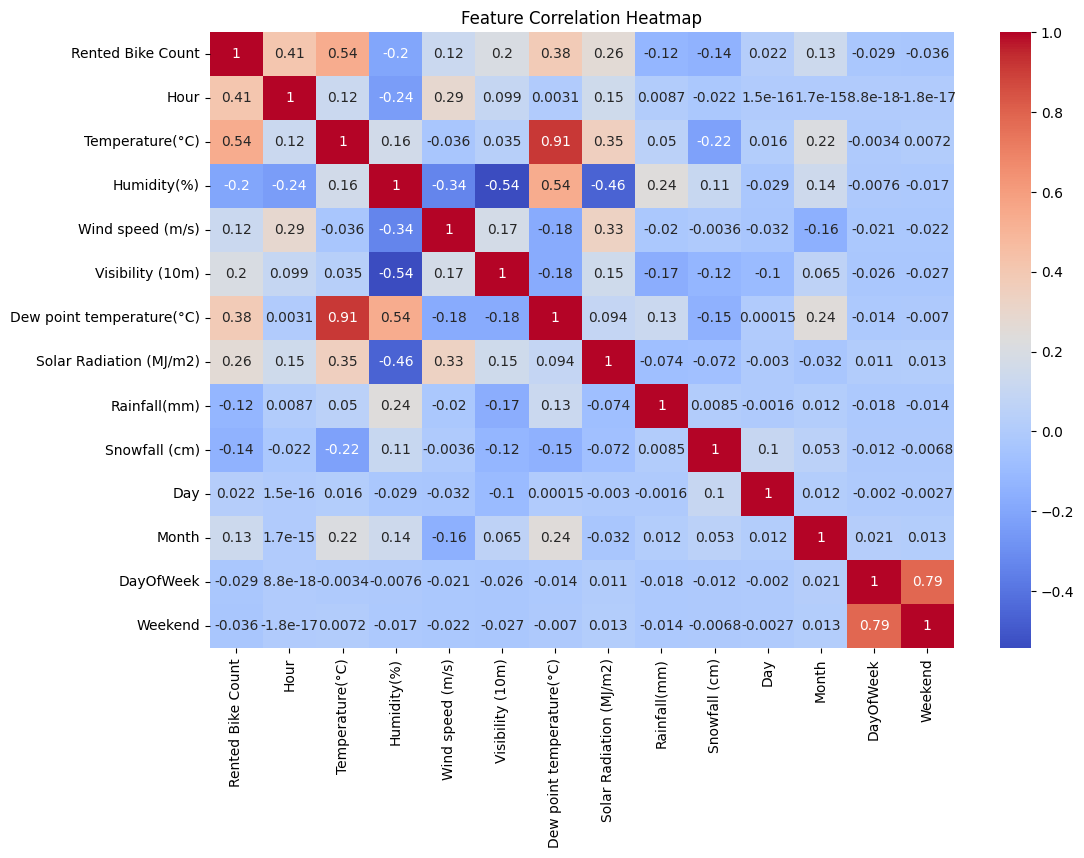

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## 5. Distribution Plot of Rented Bike Count

Plot the distribution of the target variable.

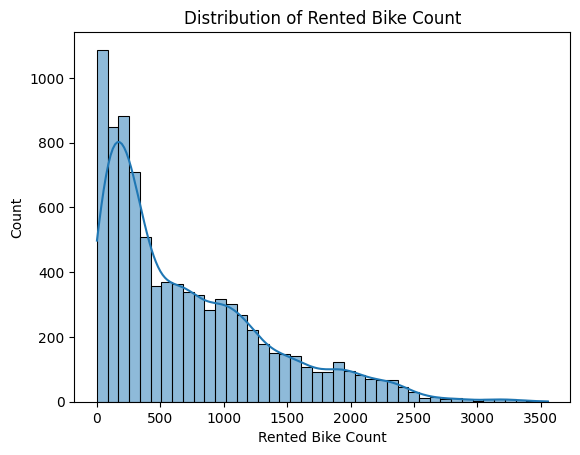

In [11]:
sns.histplot(df['Rented Bike Count'], kde=True)
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.show()

## 6. Histogram of All Numerical Features

Visualize the distribution of all numerical features.

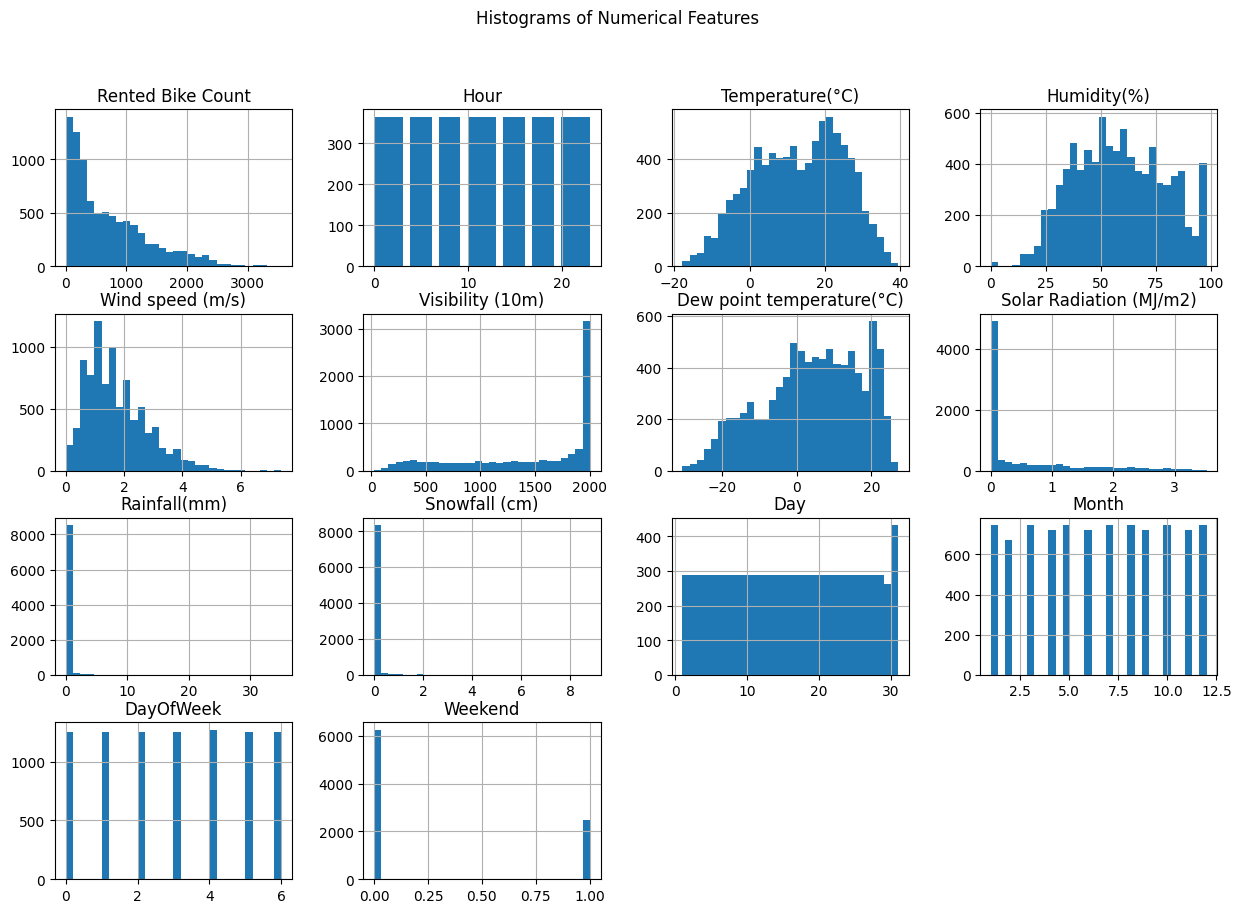

In [12]:
df.select_dtypes(include=np.number).hist(figsize=(15,10), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()

## 7. Box Plot of Rented Bike Count vs Categorical Features

Plot box plots for categorical features against the target variable.

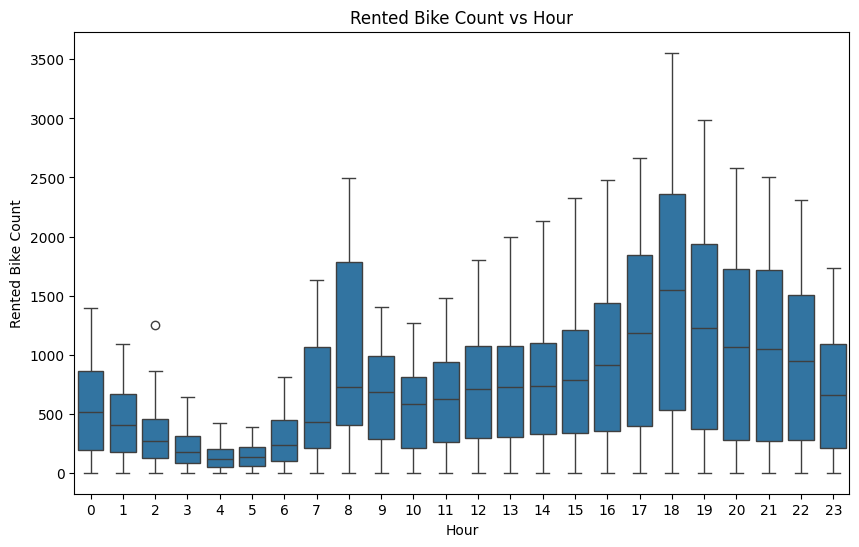

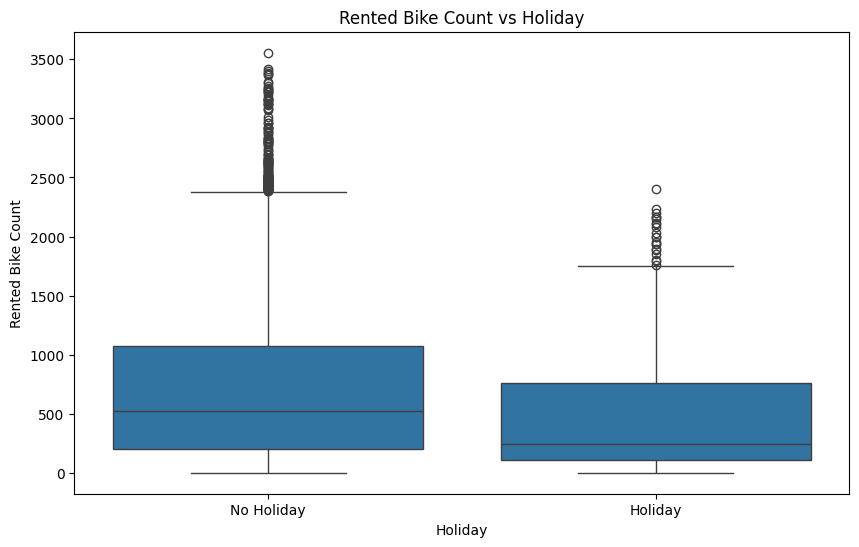

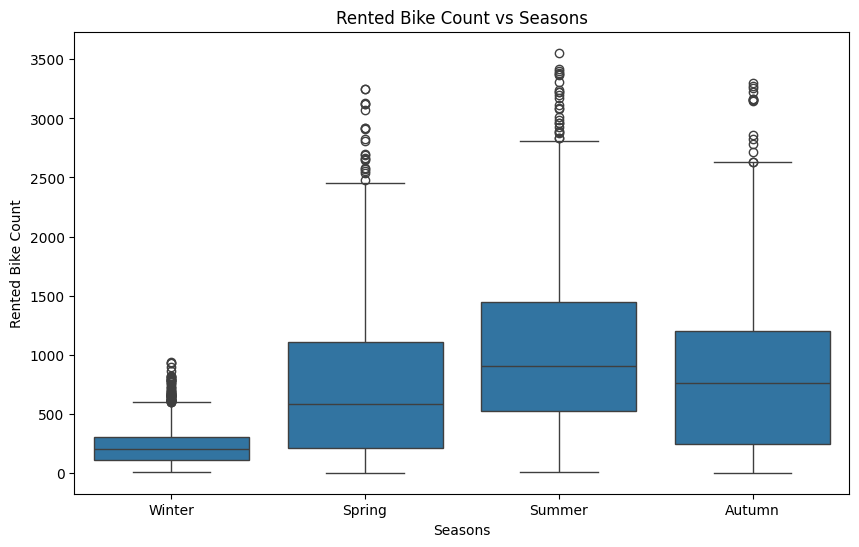

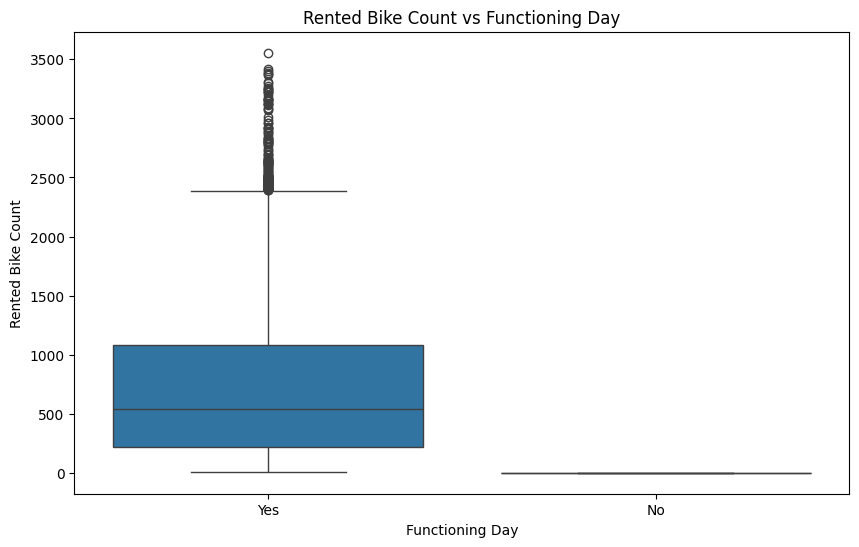

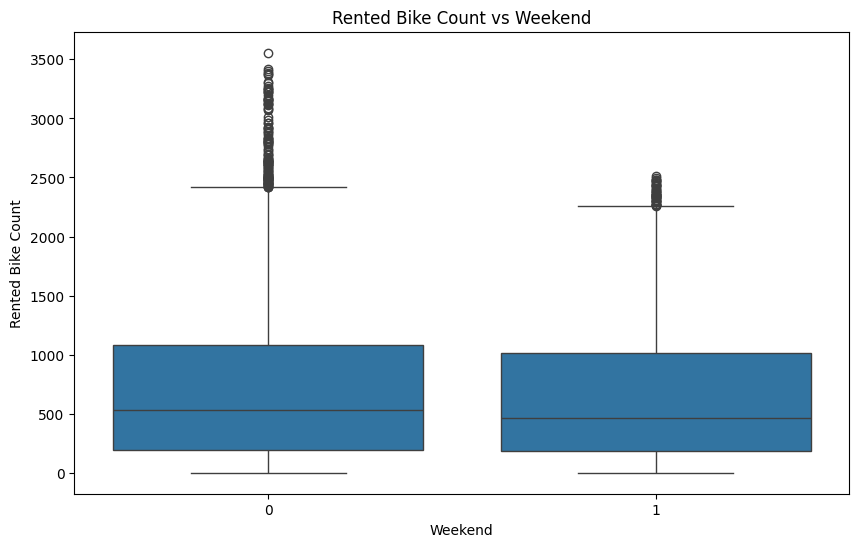

In [13]:
categorical_features = ['Hour', 'Holiday', 'Seasons', 'Functioning Day', 'Weekend']

for feature in categorical_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[feature], y=df['Rented Bike Count'])
    plt.title(f'Rented Bike Count vs {feature}')
    plt.show()

## 8. Seaborn Catplot: Rented Bike Count vs Key Features

Visualize relationships using Seaborn's catplot and provide inferences.

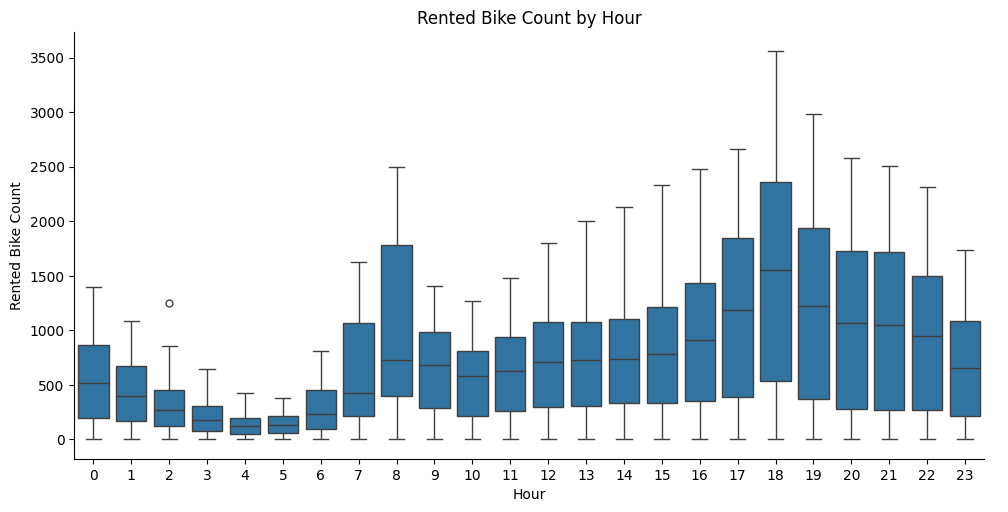

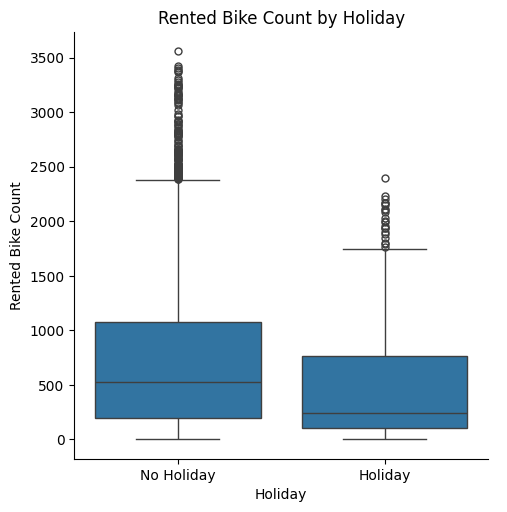

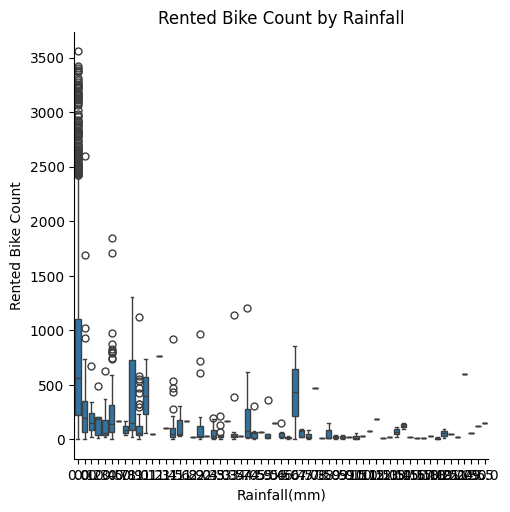

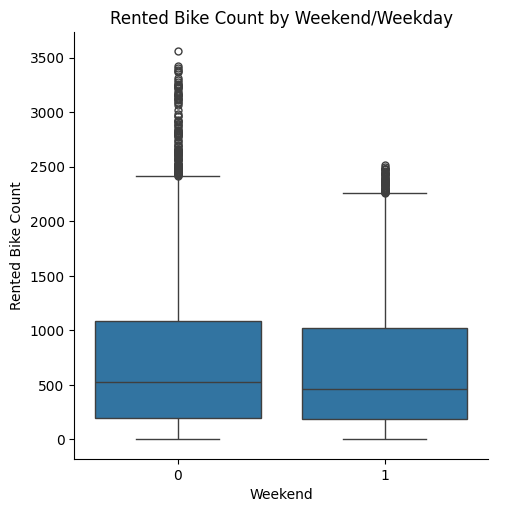

In [14]:
sns.catplot(x='Hour', y='Rented Bike Count', data=df, kind='box', height=5, aspect=2)
plt.title('Rented Bike Count by Hour')
plt.show()

sns.catplot(x='Holiday', y='Rented Bike Count', data=df, kind='box')
plt.title('Rented Bike Count by Holiday')
plt.show()

sns.catplot(x='Rainfall(mm)', y='Rented Bike Count', data=df, kind='box')
plt.title('Rented Bike Count by Rainfall')
plt.show()

sns.catplot(x='Weekend', y='Rented Bike Count', data=df, kind='box')
plt.title('Rented Bike Count by Weekend/Weekday')
plt.show()

## Inferences
1) vs Hour : people bike more in cummuter hours of 8 AM and 5-7 PM, more in the evening slot
2) vs Holidays: relatively fewer bikes rented on holidays
3) vs weekends: no change
4) vs Rainfall: Rain has significant impact on bike rental

## 9. Encode Categorical Features

Convert categorical features to numerical using one-hot encoding.

In [15]:
df_encoded = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day', 'Weekend'], drop_first=True)
df_encoded.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,DayOfWeek,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Weekend_1
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,12,4,False,False,True,True,True,False
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,12,4,False,False,True,True,True,False
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,12,4,False,False,True,True,True,False
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,12,4,False,False,True,True,True,False
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,12,4,False,False,True,True,True,False


## 10. Split Dataset into Train and Test Sets

Identify the target variable and split the data.

In [16]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['Rented Bike Count', 'Date'], axis=1) # Dropping 'Date' as it is not a feature for prediction
y = df_encoded['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 11.  Create a Pipeline for Linear Regression model with StandardScaler

In [17]:
#create a Pipeline for Linear Regression model with StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R^2: {r2_lr}')



Linear Regression MSE: 185512.59229203858
Linear Regression R^2: 0.551132785235908


## 12.  Create a Pipeline for Lasso Regression model with StandardScaler

In [18]:
from sklearn.linear_model import Lasso
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso())
])
pipeline_lasso.fit(X_train, y_train)
y_pred_lasso = pipeline_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Regression MSE: {mse_lasso}')
print(f'Lasso Regression R^2: {r2_lasso}')


Lasso Regression MSE: 185438.6091937679
Lasso Regression R^2: 0.5513117951179332


## 13.  Create a Pipeline for Ridge Regression model with StandardScaler

In [19]:
from sklearn.linear_model import Ridge
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])
pipeline_ridge.fit(X_train, y_train)
y_pred_ridge = pipeline_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression MSE: {mse_ridge}')
print(f'Ridge Regression R^2: {r2_ridge}')


Ridge Regression MSE: 185498.98284147828
Ridge Regression R^2: 0.5511657147319169


## 14. Compare Regression Models: Linear, Lasso, and Ridge



               Model            MSE       R^2
1   Lasso Regression  185438.609194  0.551312
2   Ridge Regression  185498.982841  0.551166
0  Linear Regression  185512.592292  0.551133


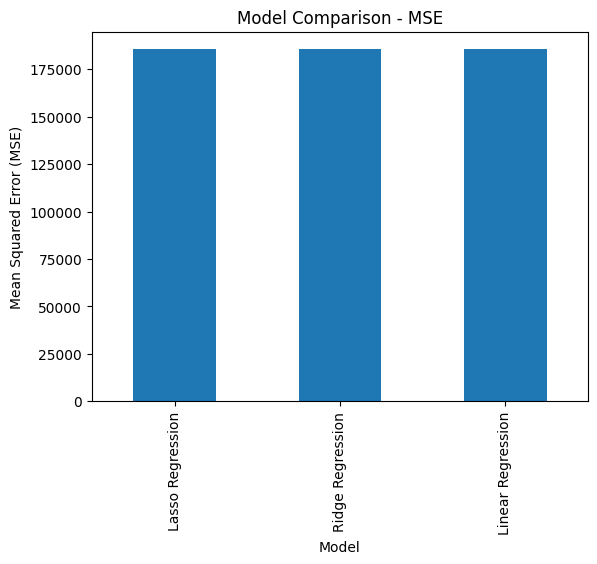

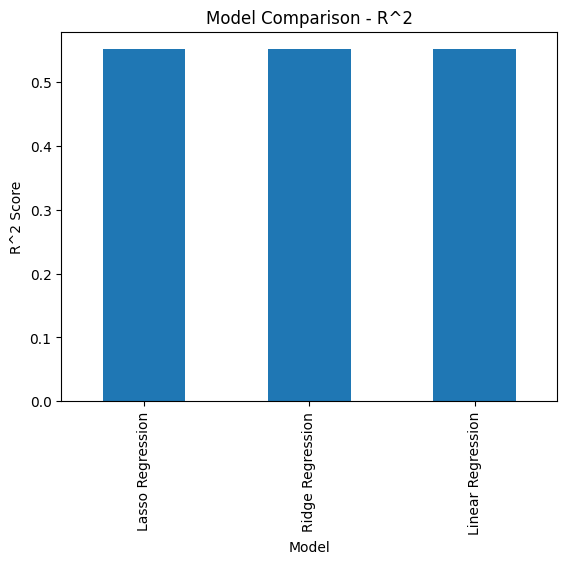

In [20]:
#compare Regression Models: Linear, Lasso, and Ridge
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'MSE': [mse_lr, mse_lasso, mse_ridge],
    'R^2': [r2_lr, r2_lasso, r2_ridge]
})
results.sort_values(by='MSE', ascending=True, inplace=True)
print(results)
import matplotlib.pyplot as plt
results.plot(x='Model', y='MSE', kind='bar', title='Model Comparison - MSE', legend=False)
plt.ylabel('Mean Squared Error (MSE)')
plt.show()
results.plot(x='Model', y='R^2', kind='bar', title='Model Comparison - R^2', legend=False)
plt.ylabel('R^2 Score')
plt.show()
